# In Class Assignment 6 - ME 364 (Spring 2022)

<font color='red'>__Question (1)__</font>: Using the dataset we used in the class notebook, develop your own classifier using features `X_Minimum`, `X_Maximum`, `Y_Minimum`, `Y_Maximum`, `Pixels_Areas`, `X_Perimeter`, `Y_Perimeter`, `Sum_of_Luminosity`, `Minimum_of_Luminosity`, `Maximum_of_Luminosity`, `TypeOfSteel_A300`, `TypeOfSteel_A400`, `Steel_Plate_Thickness` to make prediction about `Stains` type of fault for steel plates.

In [11]:
import pandas as pd

url = ('https://raw.githubusercontent.com/MasoudMiM/ME_364/main/Steel_Plates_Faults/Data.csv')
df = pd.read_csv(url,names=['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
                            'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
                            'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
                            'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
                            'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
                            'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch',
                            'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])           
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


Target variable distribution:
0    1869
1      72
Name: Stains, dtype: int64


<AxesSubplot:>

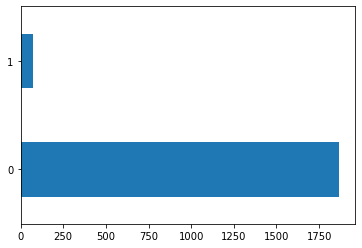

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # For normalization
import numpy as np
x_data=np.array(df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
             'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
             'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness']])
y_data=df['Stains']
print('Target variable distribution:')
print( df['Stains'].value_counts() )

df['Stains'].value_counts().plot(kind='barh')

In [13]:
MinMaxscaler = MinMaxScaler()  # define min max scaler
x_data_scaled = MinMaxscaler.fit_transform(x_data)  # transform data
x_train,x_test,y_train,y_test=train_test_split(x_data_scaled,y_data,test_size=0.3)
lr = LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)
yhatTest=lr.predict(x_test)
yhatTrain=lr.predict(x_train)

In [14]:
lr.classes_
print('Order of the classes',lr.classes_)
yhatTest_prob = lr.predict_proba(x_test)
yhatTest_prob

Order of the classes [0 1]


array([[9.73539069e-01, 2.64609309e-02],
       [9.79205836e-01, 2.07941637e-02],
       [9.77118986e-01, 2.28810138e-02],
       ...,
       [9.99543332e-01, 4.56667548e-04],
       [9.96974457e-01, 3.02554326e-03],
       [9.95395761e-01, 4.60423875e-03]])

<font color='red'>__Question (2)__</font>: Evaluate the performance of your own model developed in Question (1) using Jaccard Index, F-Score, Log Loss, and Confusion Matrix.

The accuracy for training data is 0.963
The accuracy for the test data is 0.962
----------------------------------------
Jaccard index for training data is 0.000
Jaccard index for the test data is 0.000
----------------------------------------
F-score for training data is 0.000
F-score for the test data is 0.000
----------------------------------------
Log Loss for training data is 1.272
Log loss for the test data is 1.303


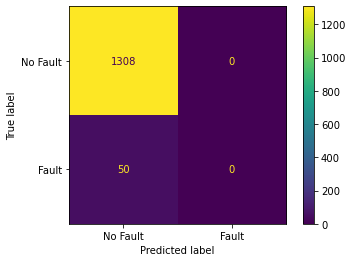

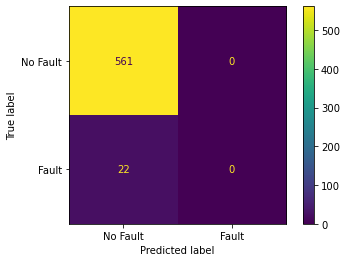

In [18]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

acc_scoreTrain = accuracy_score(y_train,yhatTrain)
acc_scoreTest = accuracy_score(y_test,yhatTest)
print(f'The accuracy for training data is {acc_scoreTrain:0.3f}')
print(f'The accuracy for the test data is {acc_scoreTest:0.3f}')

print(40*'-')

J_scoreTrain = jaccard_score(y_train,yhatTrain)
J_scoreTest = jaccard_score(y_test,yhatTest)
print(f'Jaccard index for training data is {J_scoreTrain:0.3f}')
print(f'Jaccard index for the test data is {J_scoreTest:0.3f}')

print(40*'-')

F_scoreTrain = f1_score(y_train,yhatTrain)
F_scoreTest = f1_score(y_test,yhatTest)
print(f'F-score for training data is {F_scoreTrain:0.3f}')
print(f'F-score for the test data is {F_scoreTest:0.3f}')

print(40*'-')

LogLossTrain = log_loss(y_train,yhatTrain)
LogLossTest = log_loss(y_test,yhatTest)
print(f'Log Loss for training data is {LogLossTrain:0.3f}')
print(f'Log loss for the test data is {LogLossTest:0.3f}')

CM_scoreTrain = confusion_matrix(y_train,yhatTrain)   # possible option normalize='true'
CM_scoreTest = confusion_matrix(y_test,yhatTest)   # possible option normalize='true'

dispTr = ConfusionMatrixDisplay(CM_scoreTrain,display_labels=['No Fault','Fault']) # 
dispTr.plot();

dispTs = ConfusionMatrixDisplay(CM_scoreTest,display_labels=['No Fault','Fault'])
dispTs.plot();